<a href="https://colab.research.google.com/github/CrucifierBladex/Bankrupt_prediction/blob/main/bankrupt_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/bank.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

<Figure size 432x288 with 0 Axes>

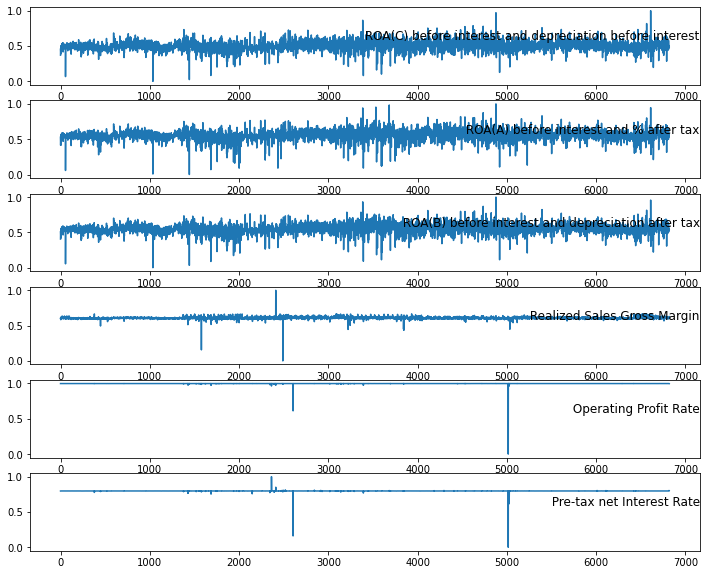

In [4]:
from matplotlib import pyplot
# load dataset
dataset = df
values = dataset.values
# specify columns to plot
groups = [1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
pyplot.figure(figsize=(12,10))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [5]:
df.shape

(6819, 96)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [7]:
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

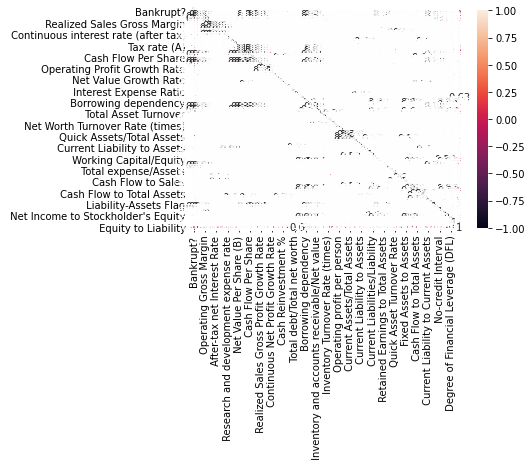

In [8]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)


In [ ]:
sns.pairplot(df,hue='Bankrupt?')

In [9]:
X = df.drop(["Bankrupt?"], axis=1)
y = df["Bankrupt?"]

In [10]:
X.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate'

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [14]:
x_train, y_train, x_test, y_test = train_test_split(X, y, test_size=0.2)
x_train=scaler.fit_transform(x_train)
y_train=scaler.fit_transform(y_train)
logreg = LogisticRegression()
logreg.fit(x_train, x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
logreg.score(y_train, y_test)

0.9714076246334311

In [24]:
model=RandomForestClassifier()
model.fit(x_train,x_test)
y_pred=model.predict(y_train)
print('accuracy:{}%'.format(accuracy_score(y_test,y_pred)*100
                           ))

accuracy:97.36070381231671%


In [ ]:
model.feature_importances_

array([1.61222141e-02, 1.27844452e-02, 1.35255352e-02, 8.72316701e-03,
       7.98169058e-03, 9.27243708e-03, 1.29256944e-02, 1.26165578e-02,
       1.44480323e-02, 1.89001395e-02, 5.47073523e-03, 6.60199372e-03,
       8.71494270e-03, 6.05772366e-04, 2.25793510e-03, 1.50159713e-02,
       2.00923348e-02, 2.30226494e-02, 2.68198566e-02, 7.26782867e-03,
       0.00000000e+00, 9.75919249e-03, 2.99062323e-02, 9.89700068e-03,
       1.06654464e-02, 8.82135119e-03, 8.30640999e-03, 8.97800036e-03,
       7.73511637e-03, 0.00000000e+00, 1.25203089e-02, 6.79633120e-03,
       0.00000000e+00, 2.51902678e-04, 1.97345095e-02, 6.05285592e-04,
       1.90898347e-02, 1.86273296e-02, 9.06682129e-03, 2.72857416e-02,
       7.10379299e-03, 9.38468847e-03, 1.85744319e-02, 9.61843652e-03,
       7.20150875e-03, 1.48219610e-04, 0.00000000e+00, 7.94128876e-03,
       7.94718115e-03, 9.45315944e-03, 5.55696688e-05, 1.26305279e-02,
       0.00000000e+00, 1.48365112e-02, 1.27129582e-02, 1.12232790e-02,
      

In [17]:
list(zip(X.columns,model.feature_importances_))

[(' ROA(C) before interest and depreciation before interest',
  0.013831787616157094),
 (' ROA(A) before interest and % after tax', 0.010087081124862587),
 (' ROA(B) before interest and depreciation after tax', 0.01523538219073909),
 (' Operating Gross Margin', 0.011577275394316765),
 (' Realized Sales Gross Margin', 0.009224166797736836),
 (' Operating Profit Rate', 0.009177722253044574),
 (' Pre-tax net Interest Rate', 0.014256761729752874),
 (' After-tax net Interest Rate', 0.014450103442604632),
 (' Non-industry income and expenditure/revenue', 0.014167434528127918),
 (' Continuous interest rate (after tax)', 0.018911120582832012),
 (' Operating Expense Rate', 0.004479306554048418),
 (' Research and development expense rate', 0.008915202484031728),
 (' Cash flow rate', 0.010251543673983987),
 (' Interest-bearing debt interest rate', 0.00023405080886437085),
 (' Tax rate (A)', 0.0022671344524827827),
 (' Net Value Per Share (B)', 0.01456293678842582),
 (' Net Value Per Share (A)', 0

In [18]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_pred)

array([[1319,    2],
       [  36,    7]])

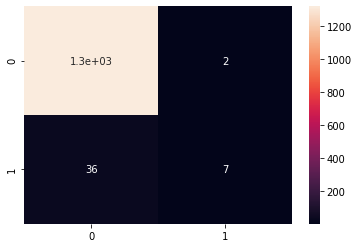

In [20]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)